In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import requests
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

## Partie 1 : La récupération et le traitement des données

#### Traitement de la base départs

##### Importation de la base

Ici on doit expliquer pourquoi l'importation en ligne n'a pas fonctionner

In [109]:
df1=pd.read_excel("Detailed_Statistics_Departures.xlsx")
# Afficher les 5 premières lignes pour vérifier
df1.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,2020-01-01 00:00:00,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0
1,AA,2020-01-01 00:00:00,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0
2,AA,2020-01-01 00:00:00,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0
3,AA,2020-01-01 00:00:00,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0
4,AA,2020-01-01 00:00:00,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0


Les deux dernières lignes de notre fichier excel correspondent à la source des données. Ainsi, on peut les supprimer. 

In [110]:
# Identifier les index des deux dernières lignes
ind= df1.index[-2:]

# Supprimer ces lignes
df1 = df1.drop(ind)

Voici la signification des variables de la base : 

**Carrier Code** : Code abrégé de la compagnie aérienne .

**Date (MM/DD/YYYY)** : Date du vol au format mois/jour/année .

**Flight Number** : Numéro unique du vol, souvent combiné avec le Carrier Code pour identifier un vol spécifique.

**Tail Number** : Numéro d'identification unique de l'avion utilisé pour le vol .

**Destination Airport** : Code de l'aéroport de destination, au format IATA (ex. "JFK" pour New York John F. Kennedy).

**Scheduled Departure Time** : Heure prévue de départ du vol, en général en heure locale.

**Actual Departure Time** : Heure réelle à laquelle l'avion a quitté la porte d'embarquement.

**Scheduled Elapsed Time (Minutes)** : Durée prévue du vol en minutes (inclut le temps de vol et le temps prévu au sol)

**Actual Elapsed Time (Minutes)** : Durée réelle du vol en minutes, mesurée de la porte d'embarquement à la porte d'arrivée.

**Departure Delay (Minutes)** : Retard au départ en minutes, calculé comme : Actual Departure Time−Scheduled Departure Time

**Wheels-off Time** : Heure à laquelle l'avion a effectivement quitté le sol.

**Taxi-Out Time (Minutes)** : Temps écoulé entre le moment où l'avion quitte la porte d'embarquement et le moment où il décolle (roulement au sol).

**Delay Carrier (Minutes)** : Retard causé par la compagnie aérienne, lié à des problèmes internes (ex. maintenance, équipage).

**Delay Weather (Minutes)** : Retard causé par des conditions météorologiques défavorables.

**Delay National Aviation System (Minutes)** : Retard lié à la gestion nationale de l'aviation, comme les restrictions de trafic aérien ou la gestion des aéroports.

**Delay Security (Minutes)** : Retard causé par des problèmes de sécurité (ex. contrôles prolongés).

**Delay Late Aircraft Arrival (Minutes)** : Retard causé par l’arrivée tardive de l’avion précédemment affecté à ce vol.

##### Extraction du jour du vol de la colonne 'Date (MM/DD/YYYY)'


D'après la sortie du code précédent, nous pouvons clairement voir que la colonne Date (MM/DD/YYYY) ne contient pas uniquement la date du jour du vol mais aussi la chaîne de caractère 00:00:00 qui renvoie à l'heure du début d'un jour.

In [71]:
df1.rename(columns={'Date (MM/DD/YYYY)': 'Date'}, inplace=True)

In [72]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [73]:
df1['Date'] = df1['Date'].dt.date

Nous souhaitons que la date soit au format "DD/MM/YYYY"

In [74]:
df1['Date'] =pd.to_datetime(df1['Date'], format="format='%m/%d/%Y")

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57410 entries, 0 to 57409
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Carrier Code                              57410 non-null  object        
 1   Date                                      57410 non-null  datetime64[ns]
 2   Flight Number                             57410 non-null  float64       
 3   Tail Number                               57184 non-null  object        
 4   Destination Airport                       57410 non-null  object        
 5   Scheduled departure time                  57410 non-null  object        
 6   Actual departure time                     57410 non-null  object        
 7   Scheduled elapsed time (Minutes)          57410 non-null  float64       
 8   Actual elapsed time (Minutes)             57410 non-null  float64       
 9   Departure delay (Minutes)   

In [76]:
df1.head()

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,2020-01-01,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0
1,AA,2020-01-01,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0
2,AA,2020-01-01,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0
3,AA,2020-01-01,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0
4,AA,2020-01-01,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0


##### Selection des variables non porteuses de sens à notre problématique

In [77]:
#justification suppression variables vols : 
#Flight number : peu informatif pour la prédiction 
#Tail Number : permet d'identifier des pbs liés à des avions spécifiques (rare)
#Scheduled elapsed time / Actual elapsed time : le temps de vol prévu/réel pas pertinent pour prédire les retards

##### Création de variables pertinentes pour expliquer les retards

##### Création de la colonne Weekday_Flight

Nous aimerions aussi voir si le retard d'un vol peut être lié au jour de la semaine où le vol aura lieu. Pour cela, il est nécessaire de créer une colonne contenant le jour de la semaine (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday) correspondant à chaque vol de notre data frame.



In [78]:
# Convertir la colonne 'Date' en format datetime 
df1['Date'] = pd.to_datetime(df1['Date'])

# Créer la colonne Weekday_Flight avec les jours de la semaine correspondant aux dates des vols
df1['Weekday_Flight'] = df1['Date'].dt.day_name()

# Afficher Date et Weekday_Flight
print(df1[['Date','Weekday_Flight']])

            Date Weekday_Flight
0     2020-01-01      Wednesday
1     2020-01-01      Wednesday
2     2020-01-01      Wednesday
3     2020-01-01      Wednesday
4     2020-01-01      Wednesday
...          ...            ...
57405 2023-12-31         Sunday
57406 2023-12-31         Sunday
57407 2023-12-31         Sunday
57408 2023-12-31         Sunday
57409 2023-12-31         Sunday

[57410 rows x 2 columns]


##### Création de la colonne Season

La variable "saison" peut influencer les retards des vols en raison des variations météorologiques et des volumes de trafic spécifiques à chaque période de l'année. Par exemple, l’hiver apporte souvent des conditions difficiles comme la neige ou le brouillard, tandis que l’été, marqué par un trafic élevé, peut être perturbé par des orages ou des surcharges aéroportuaires. Ainsi, en tenant compte des saisons, il devient possible de mieux comprendre et anticiper les facteurs contribuant aux retards.



In [79]:
# Définir une fonction qui détermine pour une date données la saison correspondante
def get_season(date):
    year = date.year
    if date >= pd.Timestamp(year=year, month=3, day=21) and date < pd.Timestamp(year=year, month=6, day=21):
        return 'Printemps'
    elif date >= pd.Timestamp(year=year, month=6, day=21) and date < pd.Timestamp(year=year, month=9, day=23):
        return 'Été'
    elif date >= pd.Timestamp(year=year, month=9, day=23) and date < pd.Timestamp(year=year, month=12, day=21):
        return 'Automne'
    else:
        return 'Hiver'


# Convertir la colonne Date en datetime 
df1['Date'] = pd.to_datetime(df1['Date'])

# Appliquer la fonction sur la colonne Date du dataframe
df1['Season'] = df1['Date'].apply(get_season)

# Afficher  des observations aléatoires du DataFrame
print(df1.Season[1000:1010])
print(df1.Season[2000:2010])

1000    Printemps
1001    Printemps
1002    Printemps
1003    Printemps
1004    Printemps
1005    Printemps
1006    Printemps
1007    Printemps
1008    Printemps
1009    Printemps
Name: Season, dtype: object
2000    Automne
2001    Automne
2002    Automne
2003    Automne
2004    Automne
2005    Automne
2006    Automne
2007    Automne
2008    Automne
2009    Automne
Name: Season, dtype: object


##### Création de la colonne Period_Day

In [80]:
# Définir une fonction pour attribuer la période de la journée
def definir_periode(heure):
    if heure >= pd.to_datetime('06:00', format='%H:%M').time() and heure < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Matin'
    elif heure >= pd.to_datetime('12:00', format='%H:%M').time() and heure < pd.to_datetime('18:00', format='%H:%M').time():
        return 'Après-midi'
    else:
        return 'Soir'

# Convertir la colonne en type datetime
df1['Scheduled departure time'] = pd.to_datetime(df1['Scheduled departure time'], format='%H:%M:%S')

# Appliquer la fonction pour créer une nouvelle colonne
df1['Period_Day'] = df1['Scheduled departure time'].dt.time.apply(definir_periode)

# Reconvertir les colonnes "Scheduled departure time" et "Actual departure time" pour ne garder que l'heure 
df1['Scheduled departure time'] = df1['Scheduled departure time'].dt.time

# Afficher les colonnes Period_Day et Scheduled departure time
print(df1[['Scheduled departure time','Period_Day']])

      Scheduled departure time  Period_Day
0                     07:30:00       Matin
1                     12:30:00  Après-midi
2                     12:00:00  Après-midi
3                     19:30:00        Soir
4                     10:30:00       Matin
...                        ...         ...
57405                 17:29:00  Après-midi
57406                 12:30:00  Après-midi
57407                 06:59:00       Matin
57408                 08:59:00       Matin
57409                 12:59:00  Après-midi

[57410 rows x 2 columns]


##### Création de notre variable cible Y=Delay

Le retard d'un vol au départ se définit comme l'écart entre l'heure de départ ou d'arrivée prévue d'un vol, telle qu'indiquée dans le programme, et l'heure réelle à laquelle le vol décolle.. Un vol est souvent considéré en retard si cet écart dépasse un seuil défini, par exemple 5 minutes.



In [81]:
# Convertir les colonnes "Scheduled departure time" et "Actual departure time" en objets datetime
df1['Scheduled departure time'] = pd.to_datetime(df1['Scheduled departure time'], format='%H:%M:%S')
df1['Actual departure time'] = pd.to_datetime(df1['Actual departure time'], format='%H:%M:%S')

# Création de la variable cible "Retard en calculant la différence en minutes et appliquer la condition
df1['Retard'] = ((df1['Actual departure time'] - df1['Scheduled departure time']).dt.total_seconds() / 60 > 0).astype(int)

# Afficher les colonnes "Actual departure time", "Scheduled departure time" et "Retard"
print(df1[['Actual departure time', 'Scheduled departure time', 'Retard']])

      Actual departure time Scheduled departure time  Retard
0       1900-01-01 07:30:00      1900-01-01 07:30:00       0
1       1900-01-01 12:24:00      1900-01-01 12:30:00       0
2       1900-01-01 13:11:00      1900-01-01 12:00:00       1
3       1900-01-01 19:26:00      1900-01-01 19:30:00       0
4       1900-01-01 10:25:00      1900-01-01 10:30:00       0
...                     ...                      ...     ...
57405   1900-01-01 17:25:00      1900-01-01 17:29:00       0
57406   1900-01-01 12:26:00      1900-01-01 12:30:00       0
57407   1900-01-01 06:57:00      1900-01-01 06:59:00       0
57408   1900-01-01 08:53:00      1900-01-01 08:59:00       0
57409   1900-01-01 12:57:00      1900-01-01 12:59:00       0

[57410 rows x 3 columns]


In [82]:

# Reconvertir les colonnes "Scheduled departure time" et "Actual departure time" pour ne garder que l'heure 
df1['Scheduled departure time'] = df1['Scheduled departure time'].dt.time
df1['Actual departure time'] = df1['Actual departure time'].dt.time

# Afficher les colonnes "Actual departure time", "Scheduled departure time" et "Retard"
print(df1[['Actual departure time', 'Scheduled departure time', 'Retard']])

      Actual departure time Scheduled departure time  Retard
0                  07:30:00                 07:30:00       0
1                  12:24:00                 12:30:00       0
2                  13:11:00                 12:00:00       1
3                  19:26:00                 19:30:00       0
4                  10:25:00                 10:30:00       0
...                     ...                      ...     ...
57405              17:25:00                 17:29:00       0
57406              12:26:00                 12:30:00       0
57407              06:57:00                 06:59:00       0
57408              08:53:00                 08:59:00       0
57409              12:57:00                 12:59:00       0

[57410 rows x 3 columns]


##### Traitement des variables catégorielle

In [83]:
#on initialise l'encodeur
label_encoder = LabelEncoder()

##### Encodage de la variable Weekday_Flight

In [84]:
#On affiche les différentes modalités de la variable
df1['Weekday_Flight'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [85]:
# Encodage de la variable Weekday_Flight
df1['Weekday_Flight_encoded'] = label_encoder.fit_transform(df1['Weekday_Flight'])

# Récupérer les modalités de Weekday_Flight et leurs codes correspondant dans la variable Weekday_Flight_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher les colonnes Weekday_Flight et Weekday_Flight_encoded
print(df1[['Weekday_Flight','Weekday_Flight_encoded']])

Modalités et leurs codes : [('Friday', 0), ('Monday', 1), ('Saturday', 2), ('Sunday', 3), ('Thursday', 4), ('Tuesday', 5), ('Wednesday', 6)]
      Weekday_Flight  Weekday_Flight_encoded
0          Wednesday                       6
1          Wednesday                       6
2          Wednesday                       6
3          Wednesday                       6
4          Wednesday                       6
...              ...                     ...
57405         Sunday                       3
57406         Sunday                       3
57407         Sunday                       3
57408         Sunday                       3
57409         Sunday                       3

[57410 rows x 2 columns]


##### Encodage de la variable Season 

In [86]:
df1['Season'].unique()

array(['Hiver', 'Printemps', 'Été', 'Automne'], dtype=object)

In [87]:
# Encodage de la variable Season
df1['Season_encoded'] = label_encoder.fit_transform(df1['Season'])

# Récupérer les modalités de Season et leurs codes correspondant dans la variable Season_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher des valeurs aléatoires de Season et Season_encoded
print(df1[['Season', 'Season_encoded']][1000:1005])
print(df1[['Season', 'Season_encoded']][2000:2005])
print(df1[['Season', 'Season_encoded']][3000:3005])

Modalités et leurs codes : [('Automne', 0), ('Hiver', 1), ('Printemps', 2), ('Été', 3)]
         Season  Season_encoded
1000  Printemps               2
1001  Printemps               2
1002  Printemps               2
1003  Printemps               2
1004  Printemps               2
       Season  Season_encoded
2000  Automne               0
2001  Automne               0
2002  Automne               0
2003  Automne               0
2004  Automne               0
     Season  Season_encoded
3000  Hiver               1
3001  Hiver               1
3002  Hiver               1
3003  Hiver               1
3004  Hiver               1


##### Encodage de la variable Period_Day

In [88]:
df1['Period_Day'].unique()

array(['Matin', 'Après-midi', 'Soir'], dtype=object)

In [89]:
# Encodage de la variable Period_Day
df1['Period_Day_encoded'] = label_encoder.fit_transform(df1['Period_Day'])

# Récupérer les modalités de Period_Day et leurs codes correspondant dans la variable Period_Day_encoded
modalites_et_codes = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes)

#Afficher les colonnes Period_Day et Period_Day_encoded
print(df1[['Period_Day','Period_Day_encoded']])

Modalités et leurs codes : [('Après-midi', 0), ('Matin', 1), ('Soir', 2)]
       Period_Day  Period_Day_encoded
0           Matin                   1
1      Après-midi                   0
2      Après-midi                   0
3            Soir                   2
4           Matin                   1
...           ...                 ...
57405  Après-midi                   0
57406  Après-midi                   0
57407       Matin                   1
57408       Matin                   1
57409  Après-midi                   0

[57410 rows x 2 columns]


##### Encodage de la variable Destination Airport

In [90]:
df1['Destination Airport'].unique()

array(['LAX', 'CLT', 'SFO', 'MIA', 'ORD', 'BOS', 'EGE', 'PHX', 'DFW',
       'AUS', 'DCA', 'SNA', 'JAC', 'STT', 'LAS', 'RDU', 'FLL', 'SAT',
       'SAN'], dtype=object)

**LAX** - Los Angeles International Airport (Los Angeles, Californie)

**CLT** - Charlotte Douglas International Airport (Charlotte, Caroline du Nord)

**SFO** - San Francisco International Airport (San Francisco, Californie)

**MIA** - Miami International Airport (Miami, Floride)

**ORD** - O'Hare International Airport (Chicago, Illinois)

**BOS** - Boston Logan International Airport (Boston, Massachusetts)

**EGE** - Eagle County Regional Airport (Vail, Colorado)

**PHX** - Phoenix Sky Harbor International Airport (Phoenix, Arizona)

**DFW** - Dallas/Fort Worth International Airport (Dallas, Texas)

**AUS** - Austin-Bergstrom International Airport (Austin, Texas)

**DCA** - Ronald Reagan Washington National Airport (Washington, D.C.)

**SNA** - John Wayne Airport (Orange County, Californie)

**JAC** - Jackson Hole Airport (Jackson, Wyoming)

**STT** - Cyril E. King Airport (Saint Thomas, Îles Vierges américaines)

**LAS** - McCarran International Airport (Las Vegas, Nevada)

**RDU** - Raleigh-Durham International Airport (Raleigh/Durham, Caroline du Nord)

**FLL** - Fort Lauderdale-Hollywood International Airport (Fort Lauderdale, Floride)

**SAT** - San Antonio International Airport (San Antonio, Texas)

**SAN** - San Diego International Airport (San Diego, Californie)

In [91]:
# Encodage de la variable Destination Airport
df1['Destination_encoded'] = label_encoder.fit_transform(df1['Destination Airport'])

# Récupérer les modalités de Destination Airport et leurs codes correspondant dans la variable Destination_encoded
modalites_et_codes1 = list(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Afficher les modalités et leurs codes
print("Modalités et leurs codes :", modalites_et_codes1)

#Afficher les colonnes Destination Airport et Destination_encoded
print(df1[['Destination Airport','Destination_encoded']])

Modalités et leurs codes : [('AUS', 0), ('BOS', 1), ('CLT', 2), ('DCA', 3), ('DFW', 4), ('EGE', 5), ('FLL', 6), ('JAC', 7), ('LAS', 8), ('LAX', 9), ('MIA', 10), ('ORD', 11), ('PHX', 12), ('RDU', 13), ('SAN', 14), ('SAT', 15), ('SFO', 16), ('SNA', 17), ('STT', 18)]
      Destination Airport  Destination_encoded
0                     LAX                    9
1                     LAX                    9
2                     CLT                    2
3                     LAX                    9
4                     SFO                   16
...                   ...                  ...
57405                 AUS                    0
57406                 MIA                   10
57407                 AUS                    0
57408                 ORD                   11
57409                 PHX                   12

[57410 rows x 2 columns]


In [92]:
df1.head()

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded
0,AA,2020-01-01,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9
1,AA,2020-01-01,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9
2,AA,2020-01-01,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0,Wednesday,Hiver,Après-midi,1,6,1,0,2
3,AA,2020-01-01,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9
4,AA,2020-01-01,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,16


##### Traitement des valeurs manquantes

In [93]:
# Percentage of missing values

miss_values= df1.isnull().sum().sort_values(ascending=False)  
miss_values

percentage= (df1.isnull().sum()/df1.isnull().count().sort_values(ascending=False))
missing_data= pd.concat([miss_values, percentage], axis=1, keys=['Number of missing values', 'Percent (%)'])

missing_data

,Number of missing values,Percent (%)
Tail Number,226,0.003937
Carrier Code,0,0.000000
Date,0,0.000000
Flight Number,0,0.000000
Destination Airport,0,0.000000
Scheduled departure time,0,0.000000
Actual departure time,0,0.000000
Scheduled elapsed time (Minutes),0,0.000000
Actual elapsed time (Minutes),0,0.000000
Departure delay (Minutes),0,0.000000


Il n'y a pas de valeurs manquantes

### Traitement de la base météorologique

Voici la signification des variables de la base : 

**temperature_2m (°C)** : Température de l'air à 2 mètres au-dessus du sol (en °C).

**relative_humidity_2m (%)** : Humidité relative à 2 mètres au-dessus du sol (en %).

**dew_point_2m (°C)** : Température du point de rosée à 2 mètres au-dessus du sol (en °C).

**apparent_temperature (°C)** : Température apparente, ou température ressentie, qui combine les effets du vent, de l'humidité relative et de la radiation solaire (en °C).

**precipitation (mm)** : Précipitations totales (pluie, averses, neige) de l'heure précédente, exprimées en millimètres.

**rain (mm)** : Précipitations liquides de l'heure précédente (pluie), exprimées en millimètres.

**snowfall (cm)** : Quantité de neige tombée lors de l'heure précédente, exprimée en centimètres.

**snow_depth (m)** : Profondeur de la neige au sol, exprimée en mètres.

**weather_code (wmo code)** : Code météorologique selon l'Organisation mondiale de la météorologie (OMM), qui représente les conditions météorologiques à partir d'une analyse de la couverture nuageuse, des précipitations et de la neige.

**pressure_msl (hPa)** : Pression atmosphérique réduite au niveau de la mer (en hPa), utilisée en météorologie pour donner une pression standardisée au niveau de la mer.

**surface_pressure (hPa)** : Pression atmosphérique à la surface, mesurée directement en hPa.

**cloud_cover (%)** : Couverture nuageuse totale en pourcentage.

**cloud_cover_low (%)** : Couverture nuageuse basse (nuages et brouillard à moins de 2 km d'altitude), en pourcentage.

**cloud_cover_mid (%)** : Couverture nuageuse moyenne (nuages de 2 à 6 km d'altitude), en pourcentage.

**cloud_cover_high (%)** : Couverture nuageuse haute (nuages au-dessus de 6 km d'altitude), en pourcentage.

**et0_fao_evapotranspiration (mm)** : Evapotranspiration de référence (ET₀) selon la méthode FAO-56 Penman-Monteith, calculée à partir de la température, de la vitesse du vent, de l'humidité et de la radiation solaire. Elle estime les besoins en irrigation pour les plantes dans un champ bien arrosé, exprimée en millimètres.

**vapour_pressure_deficit (kPa)** : Déficit de pression de vapeur (VPD) en kilopascals (kPa). Ce paramètre indique la capacité de l'air à absorber la vapeur d'eau. Un VPD élevé (supérieur à 1,6 kPa) augmente la transpiration des plantes, tandis qu'un faible VPD (inférieur à 0,4 kPa) la diminue.

**wind_speed_10m (km/h)**  : Vitesse du vent à 10 mètres au-dessus du sol, exprimée en kilomètres par heure (km/h).

**wind_speed_100m (km/h)** : Vitesse du vent à 100 mètres au-dessus du sol, exprimée en kilomètres par heure (km/h).

**wind_direction_10m (°)** : Direction du vent à 10 mètres au-dessus du sol, exprimée en degrés (°).

**wind_direction_100m (°)** : Direction du vent à 100 mètres au-dessus du sol, exprimée en degrés (°).

**wind_gusts_10m (km/h)** : Rafales de vent à 10 mètres au-dessus du sol, exprimées en kilomètres par heure (km/h).

**soil_temperature_0_to_7cm (°C)** : Température moyenne du sol entre 0 et 7 cm de profondeur, exprimée en °C.

**soil_temperature_7_to_28cm (°C)** : Température moyenne du sol entre 7 et 28 cm de profondeur, exprimée en °C.

**soil_temperature_28_to_100cm (°C)** : Température moyenne du sol entre 28 et 100 cm de profondeur, exprimée en °C.

**soil_temperature_100_to_255cm (°C)** : Température moyenne du sol entre 100 et 255 cm de profondeur, exprimée en °C.

**soil_moisture_0_to_7cm (m³/m³)** : Humidité du sol entre 0 et 7 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).

**soil_moisture_7_to_28cm (m³/m³)** : Humidité du sol entre 7 et 28 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).

**soil_moisture_28_to_100cm (m³/m³)** : Humidité du sol entre 28 et 100 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).

**soil_moisture_100_to_255cm (m³/m³)** : Humidité du sol entre 100 et 255 cm de profondeur, exprimée en mètres cubes par mètre cube (m³/m³).


In [2]:
# URL de l'API Open-Meteo avec les paramètres requis
#url = "https://archive-api.open-meteo.com/v1/archive?latitude=40.64&longitude=-73.77&start_date=2020-11-01&end_date=2024-11-01&hourly=temperature_2m,precipitation,rain,snowfall,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m&format=csv"

url="https://archive-api.open-meteo.com/v1/archive?latitude=40.64&longitude=-73.78&start_date=2020-11-01&end_date=2024-11-01&hourly=temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm&format=csv"

# Effectuer la requête GET
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Enregistrer le contenu dans un fichier CSV
    with open("weather_data.csv", "wb") as file:
        file.write(response.content)
    print("Téléchargement terminé ! Les données sont enregistrées dans 'weather_data.csv'.")
else:
    print(f"Erreur lors de la requête : {response.status_code}")

Téléchargement terminé ! Les données sont enregistrées dans 'weather_data.csv'.


In [95]:
#on charge le fichier csv en ignorant les 3 premières lignes
df2=pd.read_csv("weather_data.csv", skiprows=3)

In [96]:
df2['time'] = pd.to_datetime(df2['time'])

In [97]:
df2['time']=pd.to_datetime(df2['time'], format="format='%m/%d/%Y")

In [98]:
df2.head()

,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),et0_fao_evapotranspiration (mm),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,2020-11-01 00:00:00,7.4,64,1.1,4.1,0.0,0.0,0.0,0.0,3,1031.7,1031.3,100,94,0,0,0.02,0.37,9.1,14.7,189,191,19.8,8.0,9.9,15.6,19.7,0.385,0.392,0.276,0.327
1,2020-11-01 01:00:00,7.3,67,1.6,4.2,0.0,0.0,0.0,0.0,3,1031.2,1030.8,96,96,0,0,0.02,0.34,8.0,15.9,190,193,15.1,8.0,9.9,15.5,19.7,0.384,0.391,0.276,0.327
2,2020-11-01 02:00:00,7.9,67,2.1,4.7,0.0,0.0,0.0,0.0,3,1030.9,1030.5,89,89,0,0,0.02,0.35,9.4,17.9,187,189,15.5,8.0,9.8,15.5,19.7,0.384,0.390,0.276,0.327
3,2020-11-01 03:00:00,8.7,64,2.2,4.7,0.0,0.0,0.0,0.0,2,1030.0,1029.6,76,76,0,0,0.04,0.41,14.8,23.9,186,187,24.1,8.2,9.8,15.5,19.7,0.383,0.390,0.276,0.327
4,2020-11-01 04:00:00,9.0,64,2.4,4.9,0.0,0.0,0.0,0.0,3,1029.3,1028.9,95,95,0,0,0.05,0.42,16.1,25.6,209,208,28.4,8.4,9.8,15.4,19.7,0.383,0.389,0.277,0.327


#### Selection de nos variables

Nous supprimons les variables non pertinentes pour expliquer les retards. Par exemple la variable **apparent_temperature** est une combinaison des variables **temperature_2m** et **relative_humidity_2m**. En l'incluant, nous avons une redondance d'informations qui n'apporte pas de valeur ajoutée supplémentaire pour l'analyse.

Les variables **snow** et **rain** représentent respectivement les précipitations sous forme de neige et de pluie. Cependant, nous avons une variable **precipitation** qui regroupe déjà ces deux types de précipitations, ainsi que les averses. Pour éviter la duplication des données, il est plus judicieux de conserver precipitation et de supprimer snow et rain.

La variable **wind_speed_100m** représente la vitesse du vent à 100 mètres. Le niveau standard est de 10 mètres. Ainsi, nous avons choisi de garder la variable **wind_speed_10m**. 

Nous conservons la variable **cloud_cover** qui représente la couverture nuageuse totale, car elle affecte directement la visibilité et la sécurité des vols (notamment pour les décollages et les atterissages). 
Cependant, nous supprimons les variables **cloud_cover_mid** et **cloud_cover_high** qui représentent la couverture nuageuse moyenne et haute. Ces variables impactent moins directement les conditions qui influencent les retards. De plus, elles peuvent etre redondantes par rapport à la variable **cloud_cover**. 
Nous avons choisi de garder la variable **cloud_cover** qui peut etre associé à la formation de brouillard ou de nuages bas. 

Nous supprimons les variables qui représentent la température du sol à différentes profondeurs **(soil_moistures)**, car elles n'ont pas d'impact direct sur les phénomènes météorologiques affectant les retards de vols. 

Nous choisissons de garder la variable **wind_direction_10m** et de supprimer **wind_direction_100m**. La direction du vent peut affecter les décollages et atterrissages car les avions ont besoin d'un vent favorable (vent de face) pour effectuer un décollage ou un atterissage en toute sécurité

In [99]:
df2.drop(columns=["soil_moisture_0_to_7cm (m³/m³)", "soil_moisture_7_to_28cm (m³/m³)", 
"soil_moisture_28_to_100cm (m³/m³)", "soil_moisture_100_to_255cm (m³/m³)",
"soil_temperature_28_to_100cm (°C)", "soil_temperature_100_to_255cm (°C)",
"soil_temperature_7_to_28cm (°C)", "soil_temperature_0_to_7cm (°C)", 
"cloud_cover_mid (%)", "cloud_cover_high (%)", "wind_speed_100m (km/h)",
"wind_direction_100m (°)", "pressure_msl (hPa)", "et0_fao_evapotranspiration (mm)"
, "apparent_temperature (°C)", "rain (mm)", "snowfall (cm)" ], inplace=True)

#### Traitement des valeurs manquantes

In [100]:
# Percentage of missing values

miss_values= df2.isnull().sum().sort_values(ascending=False)  
miss_values

percentage= (df2.isnull().sum()/df2.isnull().count().sort_values(ascending=False))
missing_data= pd.concat([miss_values, percentage], axis=1, keys=['Number of missing values', 'Percent (%)'])

missing_data

,Number of missing values,Percent (%)
snow_depth (m),480,0.01368
time,0,0.00000
temperature_2m (°C),0,0.00000
relative_humidity_2m (%),0,0.00000
dew_point_2m (°C),0,0.00000
precipitation (mm),0,0.00000
weather_code (wmo code),0,0.00000
surface_pressure (hPa),0,0.00000
cloud_cover (%),0,0.00000
cloud_cover_low (%),0,0.00000


In [101]:
#on remplace par la moyenne 
df2['snow_depth (m)'] = df2['snow_depth (m)'].fillna(df2['snow_depth (m)'].mean())

### Fusion des deux bases de données

In [102]:
df1['time'] = pd.to_datetime(df1['Date'].astype(str) + ' ' + df1['Scheduled departure time'].astype(str))

In [103]:
df1['time'] = df1['time'].dt.round('H')

/tmp/ipykernel_297107/786802130.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df1['time'] = df1['time'].dt.round('H')


In [104]:
df1.head(10)

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time
0,AA,2020-01-01,1.0,N110AN,LAX,07:30:00,07:30:00,393.0,404.0,0.0,07:57:00,27.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9,2020-01-01 08:00:00
1,AA,2020-01-01,3.0,N111ZM,LAX,12:30:00,12:24:00,389.0,370.0,-6.0,12:38:00,14.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9,2020-01-01 12:00:00
2,AA,2020-01-01,111.0,N663AW,CLT,12:00:00,13:11:00,127.0,119.0,71.0,13:34:00,23.0,19.0,0.0,0.0,0.0,44.0,Wednesday,Hiver,Après-midi,1,6,1,0,2,2020-01-01 12:00:00
3,AA,2020-01-01,117.0,N113AN,LAX,19:30:00,19:26:00,402.0,379.0,-4.0,19:51:00,25.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 20:00:00
4,AA,2020-01-01,179.0,N103NN,SFO,10:30:00,10:25:00,409.0,392.0,-5.0,10:42:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,16,2020-01-01 10:00:00
5,AA,2020-01-01,243.0,N758AN,MIA,14:45:00,14:45:00,199.0,172.0,0.0,15:01:00,16.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,10,2020-01-01 15:00:00
6,AA,2020-01-01,255.0,N101NN,LAX,09:00:00,08:58:00,398.0,395.0,-2.0,09:17:00,19.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Matin,0,6,1,1,9,2020-01-01 09:00:00
7,AA,2020-01-01,300.0,N104NN,LAX,20:30:00,20:26:00,389.0,393.0,-4.0,20:58:00,32.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 20:00:00
8,AA,2020-01-01,302.0,N117AN,LAX,18:30:00,18:24:00,400.0,394.0,-6.0,18:50:00,26.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Soir,0,6,1,2,9,2020-01-01 18:00:00
9,AA,2020-01-01,306.0,N116AN,LAX,17:00:00,16:58:00,400.0,360.0,-2.0,17:15:00,17.0,0.0,0.0,0.0,0.0,0.0,Wednesday,Hiver,Après-midi,0,6,1,0,9,2020-01-01 17:00:00


In [105]:
df=pd.merge(df1, df2, on='time', how='inner')

In [106]:
df.head()

,Carrier Code,Date,Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snow_depth (m),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
0,AA,2021-01-01,1.0,N767AJ,LAX,09:00:00,08:55:00,384.0,354.0,-5.0,09:15:00,20.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,9,2021-01-01 09:00:00,-1.8,83,-4.3,0.0,0.0,3,1031.6,99,0,0.09,9.0,2,16.2
1,AA,2021-01-01,3.0,N731AN,LAX,18:05:00,18:04:00,384.0,394.0,-1.0,18:32:00,28.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Soir,0,0,1,2,9,2021-01-01 18:00:00,4.0,65,-1.9,0.0,0.0,3,1030.1,100,0,0.28,10.6,100,22.7
2,AA,2021-01-01,76.0,N113AN,SFO,07:30:00,07:25:00,412.0,380.0,-5.0,07:40:00,15.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,16,2021-01-01 08:00:00,-1.6,82,-4.3,0.0,0.0,0,1031.7,14,0,0.10,9.2,349,16.2
3,AA,2021-01-01,163.0,N557UW,CLT,11:52:00,11:46:00,123.0,127.0,-6.0,12:02:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,2,2021-01-01 12:00:00,-1.2,81,-4.0,0.0,0.0,3,1032.8,100,0,0.10,10.0,21,19.1
4,AA,2021-01-01,313.0,N765AN,MIA,14:30:00,14:24:00,197.0,173.0,-6.0,14:40:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Après-midi,0,0,1,0,10,2021-01-01 14:00:00,0.8,73,-3.5,0.0,0.0,3,1033.4,99,0,0.17,11.6,36,20.9


##### Vérification de la multicolinéarité

Nous devons vérifier la corrélation entre nos variables explicatives.

In [107]:
X = df.drop(columns=['Retard','Scheduled departure time', "Actual departure time", 'Wheels-off time', 'time', 'Date','Weekday_Flight','Season','Period_Day','Destination Airport'])

In [108]:
# Calculer la matrice de corrélation
correlation_matrix = X.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

ValueError: could not convert string to float: 'AA'

On remarque que la corrélation entre les variables wind_speed_10m (qui représente la vitesse du vent à 10m) et wind_gusts_10m (qui représente les rafales de vent) est de 0,95. Ainsi, nous choissons de supprimer la variable wind_gusts_10m.

La corrélation entre les variables temperature_2m (qui représente la température de l'air à 2 mètres au-dessus du sol) et dew_point_2m (qui représente la température du point de rosée) est égalemement elevé (0,92). Nous supprimerons la variable dew_point_2m. 

In [ ]:
df.drop(columns=['wind_gusts_10m (km/h)', 'dew_point_2m (°C)'], inplace=True)

In [ ]:
df.head()

,Date,Destination Airport,Scheduled departure time,Actual departure time,Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Weekday_Flight,Season,Period_Day,Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,time,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snow_depth (m),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°)
0,2021-01-01,LAX,09:00:00,08:55:00,09:15:00,20.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,9,2021-01-01 09:00:00,-1.8,83,0.0,0.0,3,1031.6,99,0,0.09,9.0,2
1,2021-01-01,LAX,18:05:00,18:04:00,18:32:00,28.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Soir,0,0,1,2,9,2021-01-01 18:00:00,4.0,65,0.0,0.0,3,1030.1,100,0,0.28,10.6,100
2,2021-01-01,SFO,07:30:00,07:25:00,07:40:00,15.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,16,2021-01-01 08:00:00,-1.6,82,0.0,0.0,0,1031.7,14,0,0.10,9.2,349
3,2021-01-01,CLT,11:52:00,11:46:00,12:02:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Matin,0,0,1,1,2,2021-01-01 12:00:00,-1.2,81,0.0,0.0,3,1032.8,100,0,0.10,10.0,21
4,2021-01-01,MIA,14:30:00,14:24:00,14:40:00,16.0,0.0,0.0,0.0,0.0,0.0,Friday,Hiver,Après-midi,0,0,1,0,10,2021-01-01 14:00:00,0.8,73,0.0,0.0,3,1033.4,99,0,0.17,11.6,36


In [ ]:
#df.to_csv('data.csv', index=False)

## Partie 2 : Analyse descriptive et représentation graphique

#### Analyse descriptive

Tout d'abord, nous effectuons une copie de notre dataframe en excluant les variables catégorielles non encodées (que nous avons conservé pour effectué des graphiques plus tard) et les variables liées à aux dates.

In [ ]:
df3=df.drop(columns=['Scheduled departure time', "Actual departure time", 'Wheels-off time', 'time', 'Date','Weekday_Flight','Season','Period_Day', 'Destination Airport'])

In [ ]:
df3.describe()

,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Retard,Weekday_Flight_encoded,Season_encoded,Period_Day_encoded,Destination_encoded,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),snow_depth (m),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),vapour_pressure_deficit (kPa),wind_speed_10m (km/h),wind_direction_10m (°)
count,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.000000,50697.00000,50697.000000,50697.000000
mean,23.615184,5.234057,0.534391,3.856205,0.053534,4.415863,0.317297,3.005050,1.569324,0.840030,8.592343,12.748380,72.515257,0.153098,0.005727,9.806951,1016.335448,56.946782,22.422747,0.47418,14.718206,210.452591
std,12.214167,37.093965,10.306427,17.836181,1.745238,32.155781,0.465429,2.002083,1.109805,0.690318,4.722912,9.388631,17.701248,0.730294,0.026798,19.730475,7.721855,43.194584,36.667899,0.48257,7.426214,102.570349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.400000,22.000000,0.000000,0.000000,0.000000,981.900000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,5.300000,59.000000,0.000000,0.000000,0.000000,1011.600000,5.000000,0.000000,0.15000,9.000000,144.000000
50%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,9.000000,13.000000,75.000000,0.000000,0.000000,2.000000,1016.200000,72.000000,0.000000,0.31000,13.500000,231.000000
75%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,1.000000,11.000000,20.700000,88.000000,0.000000,0.000000,3.000000,1021.300000,100.000000,27.000000,0.62000,19.100000,297.000000
max,177.000000,1627.000000,923.000000,1198.000000,190.000000,1576.000000,1.000000,6.000000,3.000000,2.000000,18.000000,34.000000,100.000000,21.400000,0.250000,75.000000,1040.700000,100.000000,100.000000,3.73000,63.500000,360.000000


La variable "Taxi-Out Time" montre qu'en moyenne, un vol passe environ 23.6 minutes sur le tarmac avant le décollage, mais certains vols peuvent être beaucoup plus long (jusqu'à 177 minutes). L'écart-type relativement élevé (12.2 minutes) montre une grande variabilité dans ces temps de taxi, qui peuvent être influecé par divers facteurs tel que la météo, le trafic aéroportuaire, etc. 

La variable "Delay carrier" indique que les retards causés par la compagnie aérienne, liés à des problèmes internes tel que la maintenance ou l'équipage, sont en moyenne de 5.23 minutes. Cependant, l'écart-type élevé (37.09 minutes) et le maximum extrême (1627 minutes) montre que des retards importants peuvent survenir. 

La variable "Delay Weather" montre que les retards dûs à la météo est en moyenne relativement faible (0,53 minutes) mais présente une variabilité, ce qui suggère que certaines conditions météorologiques peuvent causer des retards significatifs. Les valeurs extrêmes atteignant jusqu'à 923 minutes indiquent que des événements météorologiques extrêmes, tels que des tempêtes, des chutes de neige ou des conditions de vent sévères, peuvent avoir un impact majeur sur les opérations des vols.

Pour une analyse plus précise et complète des retards liés à la météo, il est crucial d'intégrer d'autres variables météorologiques telles que la température, l'humidité relative, les précipitations, la couverture nuageuse, la vitesse du vent, ou encore la pression atmosphérique.

 Les vitesses de vent moyennes sont modérées (14.72 km/h), mais des vents très forts peuvent être présents dans les données, avec une vitesse maximale de 63.5 km/h. Ces vents peuvent directement affecter les retards de vol, notamment pour les décollages ou les atterrissages.

Les précipitations (pluie, neige et averses) sont en moyenne faible avec un écart-type très faible, ce qui indique que la plupart des observations sont proches de 0. 

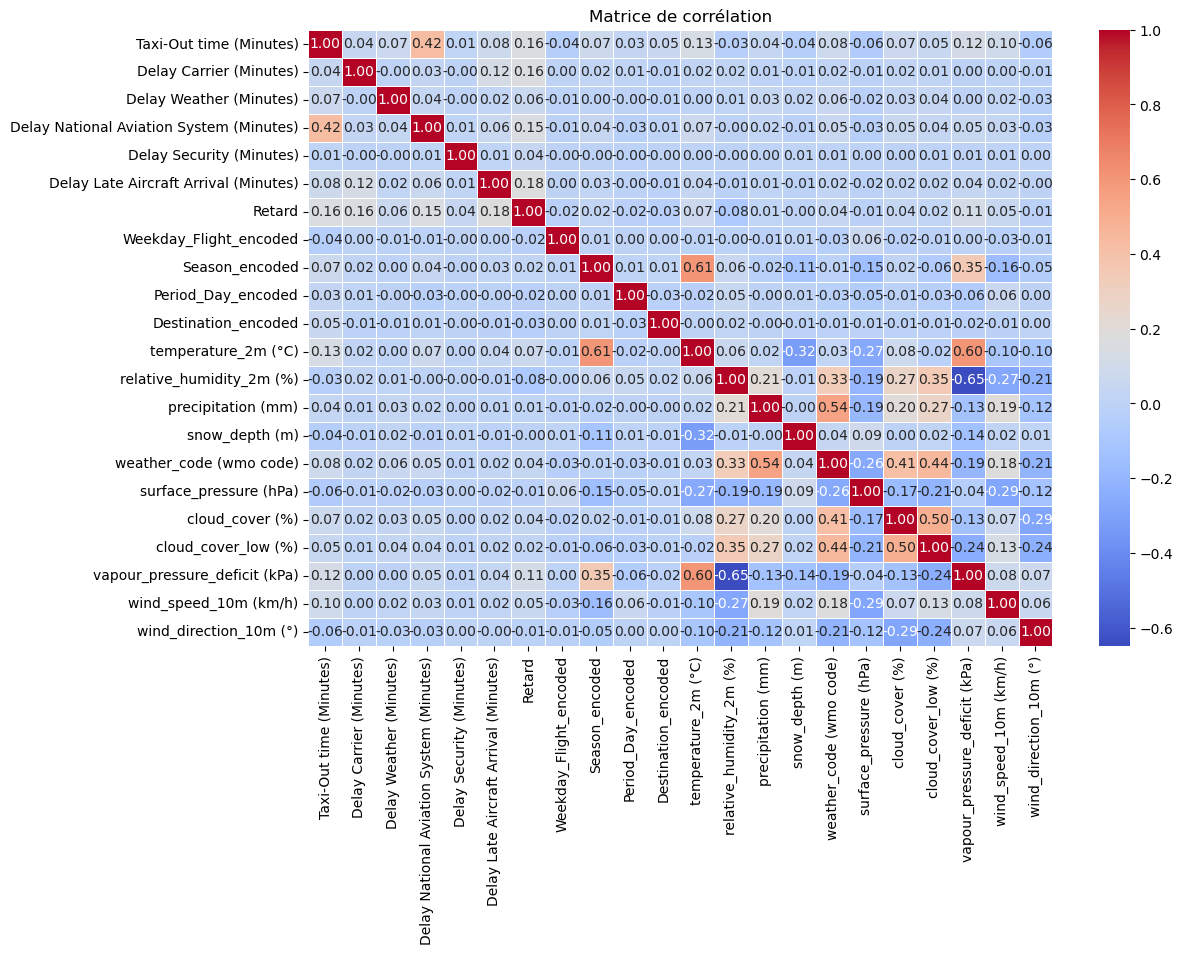

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df3.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

On observe une faible corrélation entre la variable Retard (notre variable cible) et les variables explicatives. Cela montre que l'impact direct de ces variables sur les retards est limité. 

Nous allons calculer la proportion de retards dans la base de données. 

In [ ]:
# Calcul des pourcentages pour chaque modalité
modalites = (df['Retard'].value_counts(normalize=True) * 100).round(2)
print("Pourcentage de retard :", modalites[1], "%")
print("Pourcentage de non retard :", modalites[0], "%")

Pourcentage de retard : 31.73 %
Pourcentage de non retard : 68.27 %


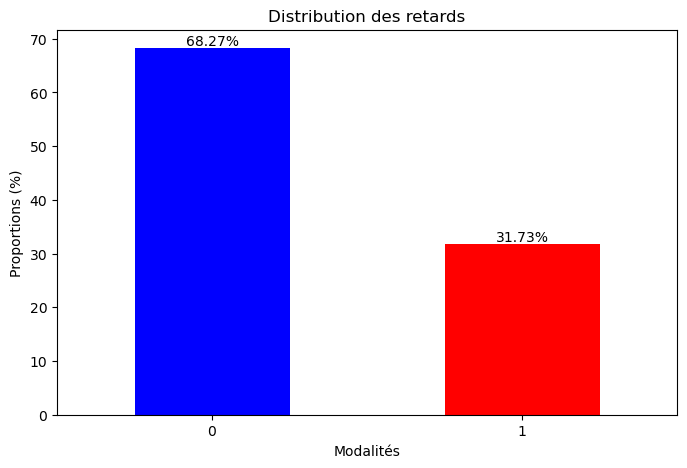

In [ ]:
# Création du graphique en barres
ax = modalites.plot(kind='bar', color=['blue', 'red'], figsize=(8, 5))
plt.title('Distribution des retards')
plt.xlabel('Modalités')
plt.ylabel('Proportions (%)')

# Ajout des annotations pour indiquer les pourcentages au-dessus des barres
for i, v in enumerate(modalites):
    ax.annotate(f"{v}%", xy=(i, v), ha='center', va='bottom')

plt.xticks(rotation=0)

# Affichage du graphique
plt.show()

On peut remarquer qu'environ 32% des vols dans notre base de données ont un retard. Ainsi, 68% des vols sont à l'heure, indiquant une bonne ponctualité globale des vols dans l'échantillon. 

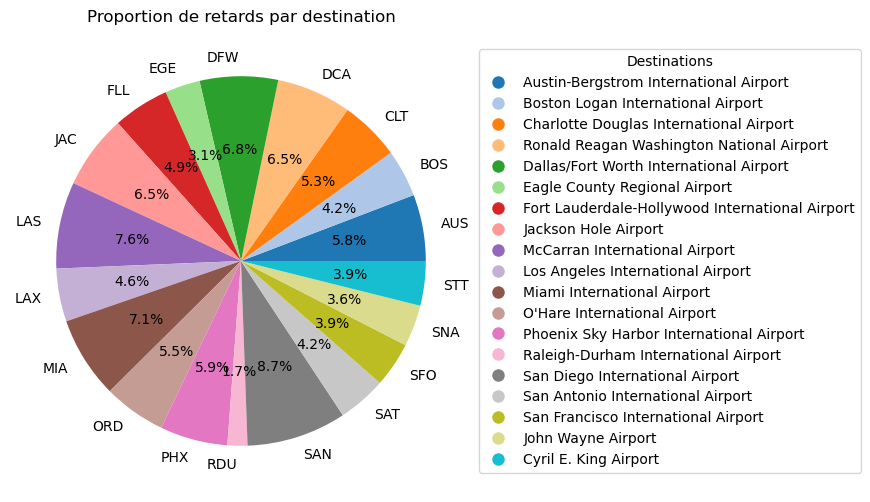

In [ ]:
#On calcule la proportion des retards pour chaque destination
prop_retards_par_destination = df.groupby('Destination Airport')['Retard'].mean() * 100

# Utiliser les acronymes pour les labels du graphique
labels = prop_retards_par_destination.index  # Définir les labels comme étant les acronymes des destinations

# Créer le graphique en camembert
plt.figure(figsize=(8, 6))
colors = plt.cm.tab20(range(len(prop_retards_par_destination)))  # Choisir une palette de 20 couleurs
plt.pie(prop_retards_par_destination, labels=prop_retards_par_destination.index, autopct='%1.1f%%', colors=colors)

# Dictionnaire de correspondance entre les acronymes des destinations et les noms complets des aéroports
noms_destinations = {
    'LAX': 'Los Angeles International Airport',
    'CLT': 'Charlotte Douglas International Airport',
    'SFO': 'San Francisco International Airport',
    'MIA': 'Miami International Airport',
    'ORD': 'O\'Hare International Airport',
    'BOS': 'Boston Logan International Airport',
    'EGE': 'Eagle County Regional Airport',
    'PHX': 'Phoenix Sky Harbor International Airport',
    'DFW': 'Dallas/Fort Worth International Airport',
    'AUS': 'Austin-Bergstrom International Airport',
    'DCA': 'Ronald Reagan Washington National Airport',
    'SNA': 'John Wayne Airport',
    'JAC': 'Jackson Hole Airport',
    'STT': 'Cyril E. King Airport',
    'LAS': 'McCarran International Airport',
    'RDU': 'Raleigh-Durham International Airport',
    'FLL': 'Fort Lauderdale-Hollywood International Airport',
    'SAT': 'San Antonio International Airport',
    'SAN': 'San Diego International Airport'
}

# Ajouter la légende avec les noms complets des aéroports
handles = [plt.Line2D([0], [0], marker='o', color='w', label=noms_destinations.get(acronyme, acronyme),
                      markersize=10, markerfacecolor=colors[i]) for i, acronyme in enumerate(labels)]
plt.legend(handles=handles, title="Destinations", loc="center left", bbox_to_anchor=(1, 0.5))


plt.title("Proportion de retards par destination")

# Afficher le graphique
plt.show()

Les vols à destination de San Francisco, Dallas-Fort Worth, Las Vegas, Miami, Washington D.C. et Jackson ont des retards légèrement supérieurs à ceux des autres destinations.

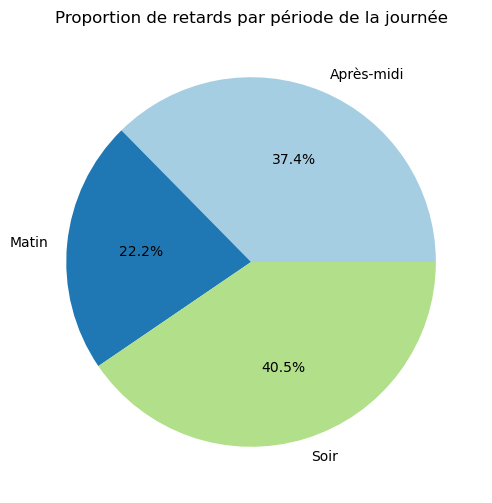

In [ ]:
# Calculer la proportion des retards pour chaque période (par mois ici)
proportion_retards_par_periode = df.groupby('Period_Day')['Retard'].mean() * 100

# Créer un graphique en camembert
plt.figure(figsize=(8, 6))
plt.pie(proportion_retards_par_periode, labels=proportion_retards_par_periode.index.astype(str), 
        autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Proportion de retards par période de la journée")

# Afficher le graphique
plt.show()

La proportion de retards est plus faible le matin. Cela peut s'expliquer par le fait que les vols matinaux sont moins impactés par des perturbations accumulées. Les retards sont plus fréquents le soir. 

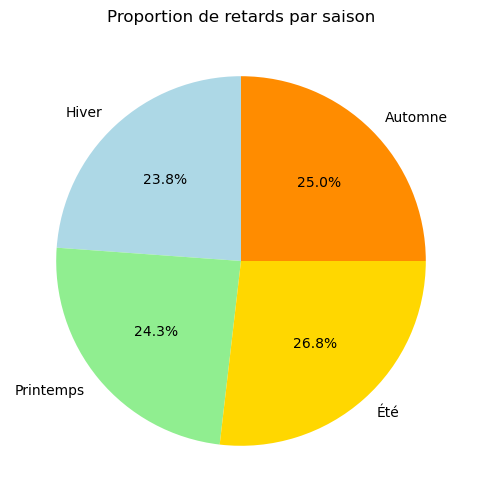

In [ ]:
# Calculer la proportion des retards pour chaque période (par mois ici)
prop_retards_par_saison = df.groupby('Season')['Retard'].mean() * 100

color_map = {
    'Printemps': '#90EE90',  # Vert
    'Été': '#FFD700',       # Jaune
    'Automne': '#FF8C00',   # Orange
    'Hiver': '#ADD8E6'      # Bleu 
}

colors = [color_map[saison] for saison in prop_retards_par_saison.index]

# Créer un graphique en camembert
plt.figure(figsize=(8, 6))
plt.pie(prop_retards_par_saison, labels=prop_retards_par_saison.index.astype(str), 
        autopct='%1.1f%%', colors=colors)
plt.title("Proportion de retards par saison")

# Afficher le graphique
plt.show()

On remarque qu'il y'a légèrement plus de retards en été que durant les autres saisons. Cela peut s'expliquer par une augmentation du volume des vols pendant la haute saison touristique. De plus, des facteurs comme la chaleur élevée peuvent également provoquer des perturbations opérationnelles. 

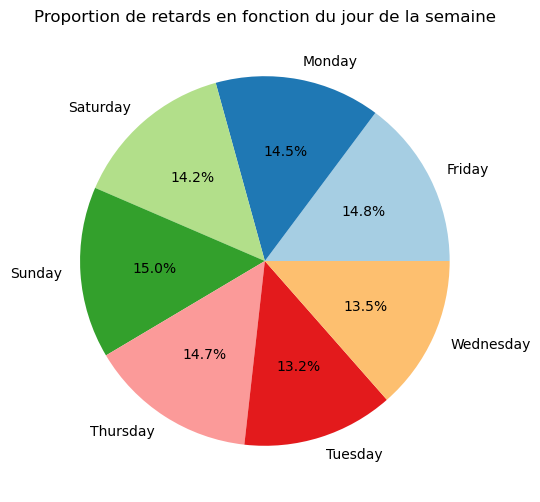

In [ ]:
# Calculer la proportion des retards pour chaque période (par mois ici)
prop_retards_par_jour = df.groupby('Weekday_Flight')['Retard'].mean() * 100

# Créer un graphique en camembert
plt.figure(figsize=(8, 6))
plt.pie(prop_retards_par_jour, labels=prop_retards_par_jour.index.astype(str), 
        autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Proportion de retards en fonction du jour de la semaine")

# Afficher le graphique
plt.show()

On constate que la proportion de retards reste relativement stable tout au long de la semaine. Il y'a légerement plus de retards les jeudis, vendredis et dimanches. 

Nous voulons explorer la relation entre les retards et les variables météorologiques. 

In [ ]:
df4=df.copy() #nous faisons une copie pour que nos modifications n'impactent pas notre base
#on divise notre variable température en 10 intervalles égaux
df4['temp'] = pd.cut(df3['temperature_2m (°C)'], bins=10) 

# Calcul du taux de retard moyen par intervalle de température
stats_temp = df4.groupby('temp')['Retard'].mean().reset_index()

/tmp/ipykernel_297107/3972399677.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_temp = df4.groupby('temp')['Retard'].mean().reset_index()


/tmp/ipykernel_297107/4223758234.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp', y='Retard', data=stats_temp, palette=colors)  # Palette ajoutée


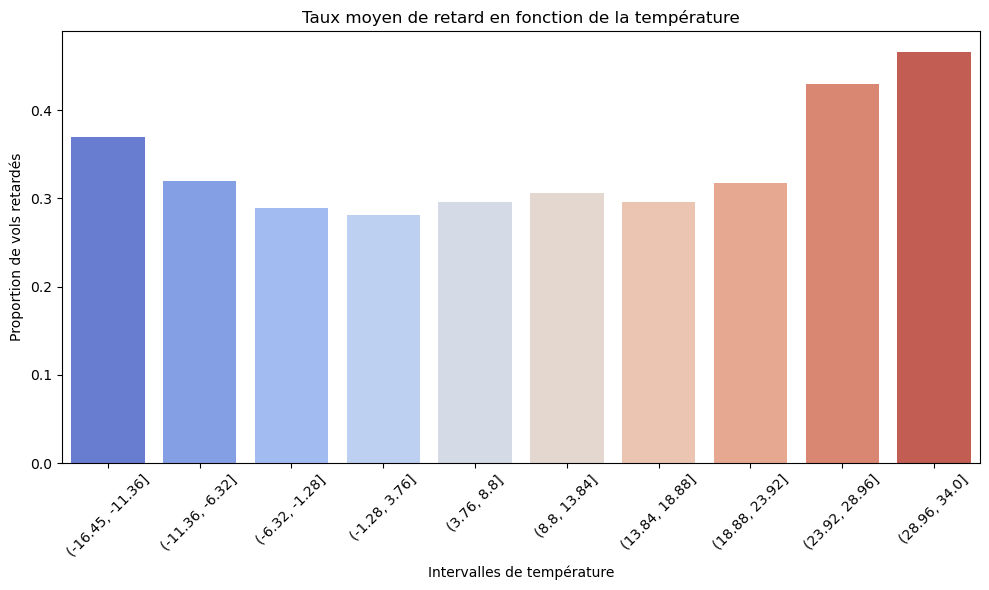

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Définir un dégradé de couleurs basé sur les intervalles de température
colors = sns.color_palette("coolwarm", len(stats_temp))  # Dégradé bleu-rouge

plt.figure(figsize=(10, 6))
sns.barplot(x='temp', y='Retard', data=stats_temp, palette=colors)  # Palette ajoutée
plt.xticks(rotation=45)
plt.title("Taux moyen de retard en fonction de la température")
plt.xlabel("Intervalles de température")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

Les proportions de vols retardés sont plus élevées pour les températures extrêmes (très basse ou très hautes). Ces températures extremes semblent avoir un impact negatif sur la ponctualité des vols, probablement en raison des perturbations qu'elles causent. 

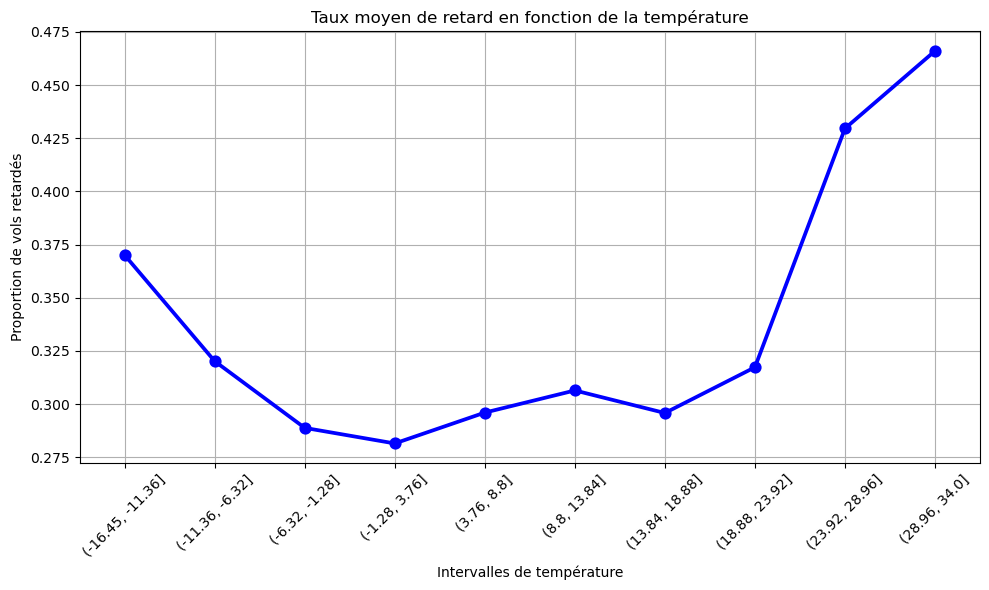

In [ ]:
plt.figure(figsize=(10, 6))

# Utiliser pointplot pour tracer une "courbe" avec une variable catégorielle
sns.pointplot(x='temp', y='Retard', data=stats_temp, markers='o', color='b')

# Ajuster les limites de l'axe des ordonnées
#plt.ylim(0, 1)

plt.tight_layout()  # Ajuste la mise en page pour éviter que les étiquettes soient coupées

# Améliorations esthétiques
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title("Taux moyen de retard en fonction de la température")
plt.xlabel("Intervalles de température")
plt.ylabel("Proportion de vols retardés")
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
#on divise notre variable température en 10 intervalles égaux
df3['vitesse'] = pd.cut(df3['wind_speed_10m (km/h)'], bins=15) 

# Calcul du taux de retard moyen par intervalle de température
stats_wind = df3.groupby('vitesse')['Retard'].mean().reset_index()

/tmp/ipykernel_297107/1241325595.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_wind = df3.groupby('vitesse')['Retard'].mean().reset_index()


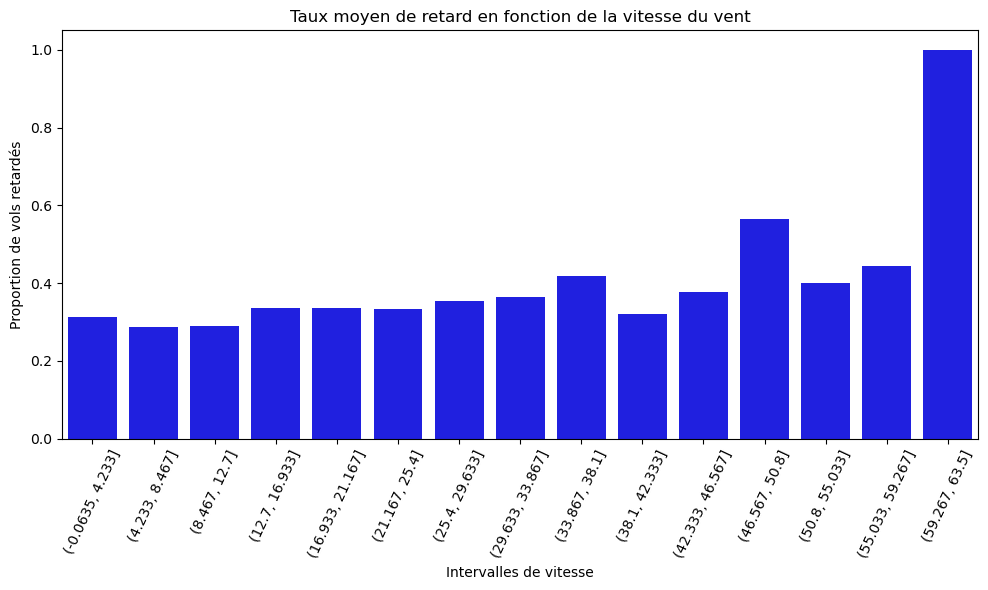

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='vitesse', y='Retard', data=stats_wind, color='blue')
plt.xticks(rotation=65)
plt.title("Taux moyen de retard en fonction de la vitesse du vent")
plt.xlabel("Intervalles de vitesse")
plt.ylabel("Proportion de vols retardés")
plt.tight_layout()
plt.show()

On observe une relation croissante entre la vitesse du vent et la proportion de vols retardés. À vitesse de vent très élevée (plus de 59 m/s), la proportion de vols retardés atteint presque 100%. Cela montre que des vents extrêmes perturbent significativement le trafic aérien. 

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,50697,2022-11-21 22:03:59.872181760,2020-11-01 00:00:00,2022-01-29 00:00:00,2022-11-11 00:00:00,2023-10-01 00:00:00,2024-11-01 00:00:00,NaN
Taxi-Out time (Minutes),50697.0,23.615184,0.0,17.0,21.0,27.0,177.0,12.214167
Delay Carrier (Minutes),50697.0,5.234057,0.0,0.0,0.0,0.0,1627.0,37.093965
Delay Weather (Minutes),50697.0,0.534391,0.0,0.0,0.0,0.0,923.0,10.306427
Delay National Aviation System (Minutes),50697.0,3.856205,0.0,0.0,0.0,0.0,1198.0,17.836181
Delay Security (Minutes),50697.0,0.053534,0.0,0.0,0.0,0.0,190.0,1.745238
Delay Late Aircraft Arrival (Minutes),50697.0,4.415863,0.0,0.0,0.0,0.0,1576.0,32.155781
Retard,50697.0,0.317297,0.0,0.0,0.0,1.0,1.0,0.465429
Weekday_Flight_encoded,50697.0,3.00505,0.0,1.0,3.0,5.0,6.0,2.002083
Season_encoded,50697.0,1.569324,0.0,1.0,2.0,3.0,3.0,1.109805


La variable "Taxi-Out Time" montre qu'en moyenne, un vol passe environ 23.6 minutes sur le tarmac avant le décollage, mais certains vols peuvent être beaucoup plus long (jusqu'à 177 minutes). L'écart-type relativement élevé (12.2 minutes) montre une grande variabilité dans ces temps de taxi, qui peuvent être influencé par divers facteurs tel que la météo, le trafic aéroportuaire, etc. 

La variable "Delay carrier" indique que les retards causés par la compagnie aérienne, liés à des problèmes internes tel que la maintenance ou l'équipage, sont en moyenne de 5.23 minutes. Cependant, l'écart-type élevé (37.09 minutes) et le maximum extrême (1627 minutes) montre que des retards importants peuvent survenir. 

La variable "Delay Weather" montre que les retards dûs à la météo est en moyenne relativement faible (0,53 minutes) mais présente une variabilité, ce qui suggère que certaines conditions météorologiques peuvent causer des retards significatifs. Les valeurs extrêmes atteignant jusqu'à 923 minutes indiquent que des événements météorologiques extrêmes, tels que des tempêtes, des chutes de neige ou des conditions de vent sévères, peuvent avoir un impact majeur sur les opérations des vols.

Pour une analyse plus précise et complète des retards liés à la météo, il est crucial d'intégrer d'autres variables météorologiques telles que la température, l'humidité relative, les précipitations, la couverture nuageuse, la vitesse du vent, ou encore la pression atmosphérique.

 Les vitesses de vent moyennes sont modérées (14.72 km/h), mais des vents très forts peuvent être présents dans les données, avec une vitesse maximale de 63.5 km/h. Ces vents peuvent directement affecter les retards de vol, notamment pour les décollages ou les atterrissages.

Les précipitations (pluie, neige et averses) sont en moyenne faible avec un écart-type très faible, ce qui indique que la plupart des observations sont proches de 0. 

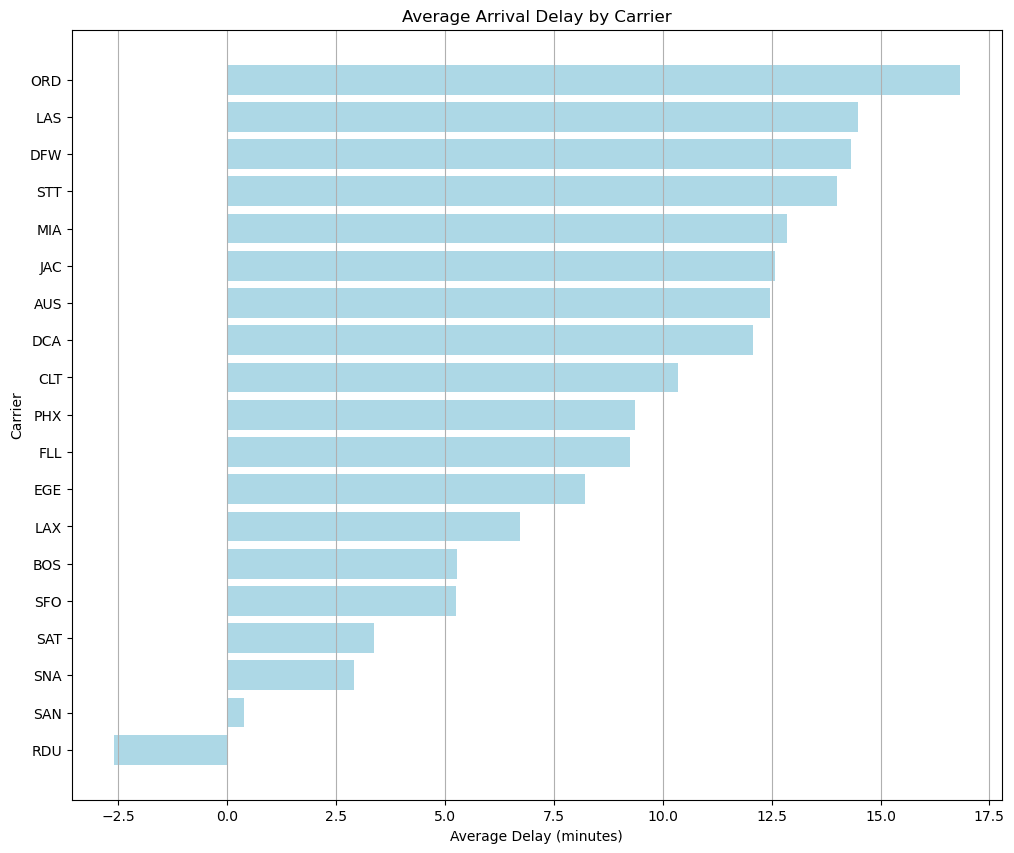

In [113]:
average_delay_per_carrier = df1.groupby('Destination Airport')['Departure delay (Minutes)'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 10))
plt.barh(average_delay_per_carrier['Destination Airport'], average_delay_per_carrier['Departure delay (Minutes)'], color='lightblue')
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Carrier')
plt.grid(axis='x')
plt.show()